# Projet Simulation et méthodes Monte Carlo - Stratification

### Import des librairies nécessaires

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import qmc
import itertools
import scipy.stats as stats
#%pip install chaospy

### Définition de la fonction f(.)

In [15]:
def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))


# 1ère partie : Estimation par MC et QMC

## Estimation par méthode Monte Carlo 

In [16]:
def monte_carlo_integration(d, nb_ech):
    total = 0
    for i in range(nb_ech):
        u = np.random.rand(d)
        total += f(u)
    mean_value = total/nb_ech
    volume = np.prod([1.0]*d) # volume of the integration region is 1**d = 1
    estimated_integral = mean_value * volume
    return estimated_integral


def monte_carlo_integration2(d, num_samples):
    total = 0
    for i in range(num_samples):
        samples = np.random.uniform(0, 1, size=(d,))
        total += f(samples)
    volume = 1**d
    estimated_integral = (total/num_samples) * volume
    return estimated_integral

d = 3
nb_ech = 1000000
result = monte_carlo_integration(d, nb_ech)
print("Estimated value of the integral for d={} is {:.6f}".format(d, result))

Estimated value of the integral for d=3 is 1.001343


Alors là chatgpt m'a donné deux méthodes, la première fait vrmt pitié je pense que jv juste arranger la 2e (plus tard la j'ai vitef la flemme)

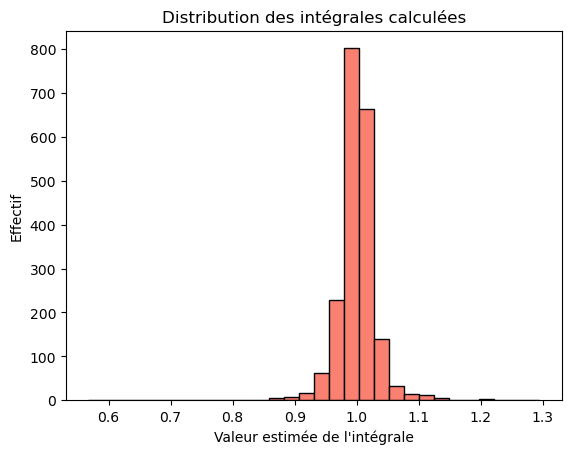

In [17]:
d = 5  # dimension de l'espace d'intégration
num_samples = 2000
plt_vals = []

for i in range(num_samples):
    result = monte_carlo_integration2(d, i+1)
    plt_vals.append(result)

plt.title("Distribution des intégrales calculées")
plt.hist (plt_vals, bins=30, color = 'salmon', ec="black") 
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.show() 

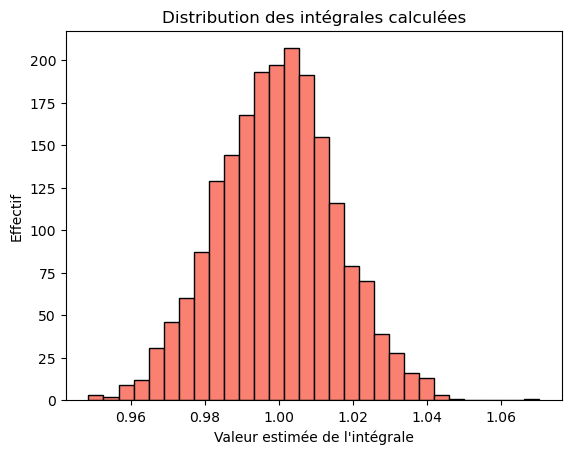

In [18]:
# Bornes d'intégration 
a = 0
b = 1 
N = 2000

# Création d'une liste pour stocker toutes les valeurs pour tracé
plt_vals = []

# Itération 
for i in range(N):

    #Array de zéros de taille N
    ar = np.zeros(N)

    # itération pour chaque valeur de 'ar' et ajout d'une valeur aléatoire entre 0 et 1 
    for i in range (len(ar)):
        ar[i] = np.random.uniform(a,b)

    # Création d'une variable qui somme les fonctions appliquées aux différentes valeurs générées
    integral = 0.0

    # Itération et somme des différents f(u)
    for i in ar:
        u = np.array([i])
        integral += f(u)

    # On estime chaque intérale 
    ans = (b-a)/float(N)*integral

    # On ajoute la valeur de l'intégrale estimée pour la tracer à la fin
    plt_vals.append(ans)

# Mise en place du tracé
plt.title("Distribution des intégrales calculées")
plt.hist (plt_vals, bins=30, color = 'salmon', ec="black") 
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.show() 

## Estimation par méthode Quasi Monte Carlo

On utilise la suite de Halton (blabla à compléter plus tard j'ai la giga flemme)

In [19]:
def quasi_monte_carlo_integration(d, num_samples):
    total = 0
    halton_seq = qmc.Halton(d)
    samples = halton_seq.random(num_samples)
    for i in range(num_samples):
        u = samples[i]
        total += f(u)
    mean_value = total/num_samples
    volume = np.prod([1.0]*d) 
    estimated_integral = mean_value * volume
    return estimated_integral

d = 2
num_samples = 1000
result = quasi_monte_carlo_integration(d, num_samples)
print("Estimated value of the integral for d={} is {:.6f}".format(d, result))

Estimated value of the integral for d=2 is 0.999066


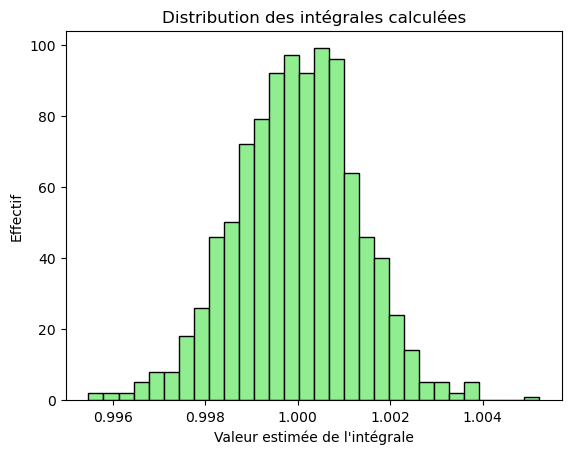

In [20]:
# limits of integration
a = 0
b = 1
d = 2
N = 1000

# list to store all the values for plotting 
plt_vals = []

# we iterate through all the values to generate 
# multiple results and show whose intensity is 
# the most.
for i in range(N):
    result = quasi_monte_carlo_integration(d, num_samples=1000)
    plt_vals.append(result)




plt.hist (plt_vals, bins=30, color='lightgreen', edgecolor='black') 
plt.title("Distribution des intégrales calculées")
plt.xlabel("Valeur estimée de l'intégrale")
plt.ylabel("Effectif")
plt.show() # shows the plot 

Approximate the integral of f using standard Monte Carlo and quasi-Monte Carlo,
and compare the results, for different values of d (and different Monte Carlo sample
sizes!).
= bon là il faudrait tracer pour plusieurs paramètres, on peut comparer les résultats a chaque fois en faisant des stats des ou jsp en calculant des ratios (je maitrise pas encore le cours mdrr)

# 2ème partie : Implémentation des estimateurs d'ordre 1 et 2 d'Haber


##  2.1 : Estimateur d'Haber d'ordre 1 

In [21]:
r = 1
m = 0
s = 9

def C(k, s):
    C = []  # Liste pour stocker les ensembles ((2j1+1)/2k, ..., (2js+1)/2k)

    for j in itertools.product(range(k), repeat=s):
        Cj = [(2*j[i]+1)/(2*k) for i in range(s)]
        C.append(tuple(Cj))

    return C
#en vrai jsp si c la bonne solution,  a premiere vue ca m'a l'air ok mais bon


def haberordre1(s, k, f) : 
    n = k**s
    Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
    I = 0
    for c in C(k) :
        I += f(c + Uc)
    I = I / n
    return I


In [22]:
#C(3, s)

## 2.2 : Estimateur d'Haber d'ordre 2

In [23]:
def gc(u,f) :  
    g = (f(c+u) + f(c - u)) / 2

def haberordre2(s, k, f) : 
    n = 2*k**s
    Uc = [random.uniform(-1/(2*k), 1/(2*k)) for i in range(s)]
    I = 0
    for c in C(k) :
        I += gc(Uc)
    I = I / n
    return I

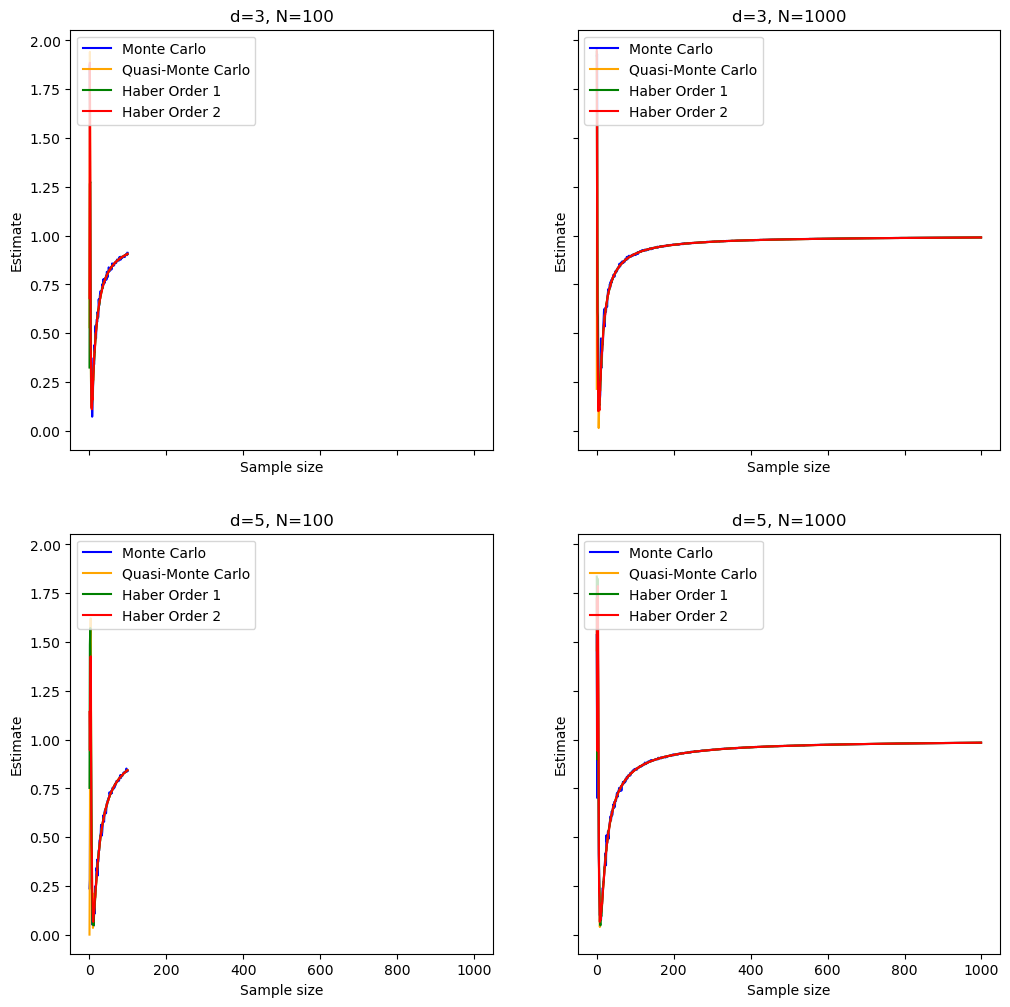

In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*(np.sum(u, axis=1)/d - 0.5))

def monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = np.random.rand(N, d)
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates

def quasi_monte_carlo(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        estimate = np.mean(values)
        estimates.append(estimate)
    return estimates

def haber_order1(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        diffs = np.subtract.outer(values, values)
        estimate = np.mean(values) + 0.5*np.mean(diffs)
        estimates.append(estimate)
    return estimates

def haber_order2(d, Ns):
    estimates = []
    for N in Ns:
        samples = stats.qmc.Sobol(d).random(N)
        values = f(samples)
        diffs = np.subtract.outer(values, values)
        squares = np.square(diffs)
        estimate = np.mean(values) + 0.5*np.mean(diffs) + (1/3)*np.mean(squares*diffs)
        estimates.append(estimate)
    return estimates

# limits of integration
a = 0
b = 1
ds = [3, 5]
Ns = [100, 1000]
methods = [monte_carlo, quasi_monte_carlo, haber_order1, haber_order2]
labels = ["Monte Carlo", "Quasi-Monte Carlo", "Haber Order 1", "Haber Order 2"]
colors = ["blue", "orange", "green", "red"]

fig, axs = plt.subplots(len(ds), len(Ns), figsize=(12, 12), sharex=True, sharey=True)

for i, d in enumerate(ds):
    for j, N in enumerate(Ns):
        for k, method in enumerate(methods):
            estimates = method(d, range(1, N+1))
            axs[i, j].plot(estimates, color=colors[k])
            axs[i, j].set_title("d={}, N={}".format(d, N))
            axs[i, j].set_xlabel("Sample size")
            axs[i, j].set_ylabel("Estimate")
            axs[i, j].legend(labels, loc="upper left")

#plt.tight_layout()
#plt.show()


Estimated value of the integral for Monte Carlo is 1.039670
Estimated value of the integral for Quasi-Monte Carlo is 0.997729
Estimated value of the integral for Haber Order 1 is 0.999255
Estimated value of the integral for Haber Order 2 is 1.000393


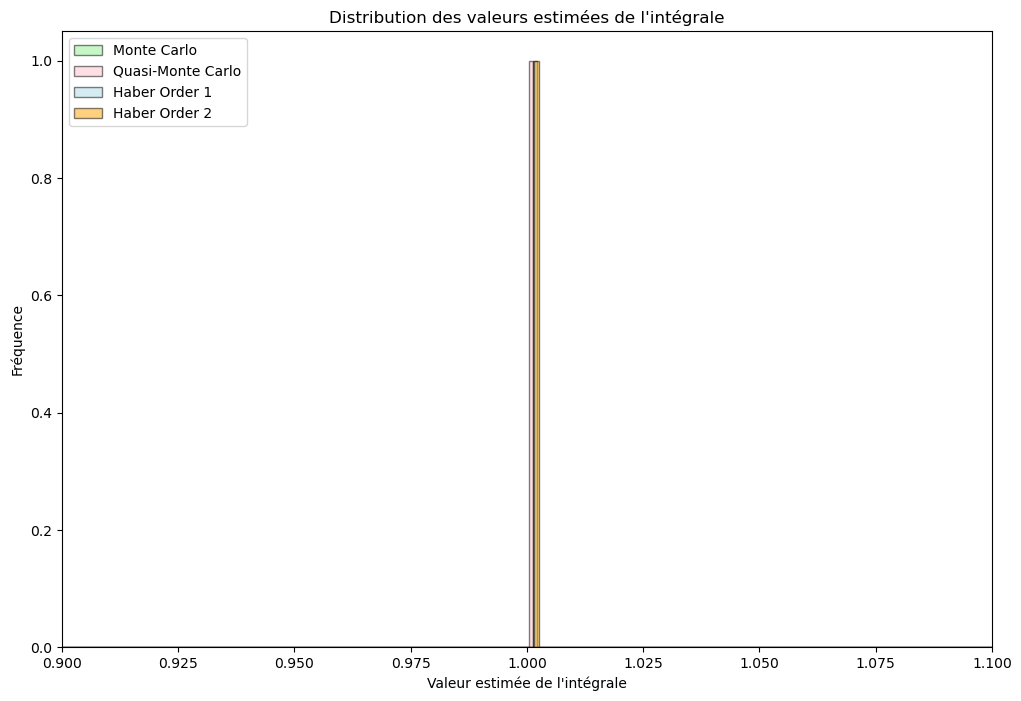

In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools

def f(u):
    d = len(u)
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))

def monte_carlo_integration(d, num_samples):
    samples = np.random.rand(num_samples, d)
    values = f(samples)
    return np.mean(values)

def quasi_monte_carlo_integration(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    return np.mean(values)

def haber_order1_integration(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    diffs = np.subtract.outer(values, values)
    return np.mean(values) + 0.5*np.mean(diffs)

def haber_order2_integration(d, num_samples):
    samples = stats.qmc.Sobol(d).random(num_samples)
    values = f(samples)
    diffs = np.subtract.outer(values, values)
    squares = np.square(diffs)
    return np.mean(values) + 0.5*np.mean(diffs) + (1/3)*np.mean(squares*diffs)

# limits of integration
a = 0
b = 1
d = 2
N = 1000

# list of integration methods to try
methods = [monte_carlo_integration, quasi_monte_carlo_integration, haber_order1_integration, haber_order2_integration]
labels = ["Monte Carlo", "Quasi-Monte Carlo", "Haber Order 1", "Haber Order 2"]

# compute values for each method
plt_vals1 = monte_carlo_integration(d, num_samples=N)
plt_vals2 = quasi_monte_carlo_integration(d, num_samples=N)
plt_vals3 = haber_order1_integration(d, num_samples=N)
plt_vals4 = haber_order2_integration(d, num_samples=N)

plt_vals = []
for method in methods:
    result = method(d, num_samples=N)
    plt_vals.append(result)
    print("Estimated value of the integral for {} is {:.6f}".format(labels[methods.index(method)], result))

# set up colors for plotting
colors = itertools.cycle(['lightgreen', 'pink', 'lightblue', 'orange'])

# plot the histograms
fig, axs = plt.subplots(figsize=(12, 8))
axs.hist(plt_vals1, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.hist(plt_vals2, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.hist(plt_vals3, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.hist(plt_vals4, bins=1000, color=next(colors), edgecolor='black', alpha=0.5)
axs.set_title("Distribution des valeurs estimées de l'intégrale")
axs.set_xlabel("Valeur estimée de l'intégrale")
axs.set_ylabel("Fréquence")
axs.legend(labels, loc="upper left")
axs.set_xlim(0.9, 1.1)
plt.show()


# 3. Réponse à la question par Importance Sampling

cf explications de Samy

In [28]:
def f1(x) : 
    return abs(x)

def f2(x) : 
    return x - abs(x)

In [57]:
import numpy as np
from scipy.stats import norm

def f(u):
    d = u.shape[0]
    return 1 + np.sin(2*np.pi*np.sum(u)/d)

# Nombre d'échantillons et de dimensions
N = 10000
d = 2

# Définition des fonctions f1 et f2
f1 = lambda x: np.abs(x)
f2 = lambda x: x - np.floor(x)

# Loi Z1
Z1 = (f1(norm.rvs(size=(N,d))) + f2(norm.rvs(size=(N,d))))/2
p1 = ((2-4*Z1)*(Z1>=0)*(Z1<=0.5) + (4*Z1-2)*(Z1>0.5)*(Z1<=1))
w1 = np.exp(-np.sum(Z1**2/2, axis=1) + np.sum(norm.logpdf(Z1), axis=1)) / np.sum(p1, axis=1)

# Loi Z2
Z2 = np.random.uniform(size=(N,d))
w2 = np.ones(N)

# Calcul de l'intégrale
X = np.concatenate((Z1, Z2), axis=0)
w = np.concatenate((w1, w2), axis=0)
w = w/np.sum(w)
I = np.mean(f(X)*w)

print('Intégrale:', I)


Intégrale: nan


C:\Users\blaze\AppData\Local\Temp\ipykernel_43028\2104338221.py:19: RuntimeWarning: divide by zero encountered in divide
  w1 = np.exp(-np.sum(Z1**2/2, axis=1) + np.sum(norm.logpdf(Z1), axis=1)) / np.sum(p1, axis=1)
C:\Users\blaze\AppData\Local\Temp\ipykernel_43028\2104338221.py:28: RuntimeWarning: invalid value encountered in divide
  w = w/np.sum(w)


In [62]:
import numpy as np
from scipy.stats import uniform

def f(u):
    d = u.shape[0]
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))

# Nombre d'échantillons et de dimensions
N = 10000
d = 3

# Définition de la fonction g
g = lambda x: x - np.floor(x)

# Définition de la densité z
def z(x):
    if x < 0 or x > 1:
        return 0
    elif x <= 0.5:
        return 2 - 4*x
    else:
        return 4*x - 2

# Loi Z
Z = np.zeros((N, d))
for j in range(d):
    Z[:,j] = uniform.rvs(size=N)
    Z[:,j] = g(Z[:,j])

w = np.ones(N)
for i in range(N):
    for j in range(d):
        w[i] *= z(Z[i,j])
        
# Calcul de l'intégrale
X = Z
w = w/np.sum(w)
I = np.mean(f(X)*w)

print('Intégrale:', I)


Intégrale: 9.899508559130359e-05


In [66]:
import numpy as np
from scipy.stats import uniform

def f(u):
    d = u.shape[0]
    return 1 + np.sin(2*np.pi*(np.sum(u)/d - 0.5))

# Nombre d'échantillons et de dimensions
N = 10000
d = 10

# Définition de la densité z
z = lambda x: (2-4*x)*(x>=0)*(x<=0.5) + (4*x-2)*(x>0.5)*(x<=1)

# Tirage des échantillons suivant la densité z
U = uniform.rvs(size=(N,d))
X = (U*z(U))/z(U)
w = 1/(N*z(X))


# Calcul de l'intégrale
I = np.mean(f(X)*w)

print('Intégrale:', I)


Intégrale: 0.0009782612383366805
